In [9]:
# %%
import pandas as pd
import pymysql
from pymysql.cursors import DictCursor
from sqlalchemy import create_engine, text
from sqlalchemy_utils import database_exists, create_database
import os
import numpy as np
# %%
# MySQL 연결 정보
db_config = {
    'host': 'changsoft1.iptime.org',
    'port': 18800,
    'user': 'changsoft',
    'password': 'chang2008!',
    'database': 'structure2'
}

db_url = f"mysql+pymysql://{db_config['user']}:{db_config['password']}@{db_config['host']}:{db_config['port']}/{db_config['database']}"

engine = create_engine(db_url)

db_name = db_config['database']

try:
    connection = engine.connect()
    if connection:
        print(f"Successfully connected to database {db_name}")
    else:
        print("Failed to create connection")
        exit()
except Exception as e:
    print(f"An error occurred when trying to connect to database {db_name}: {str(e)}")
    exit()   


Exception during reset or similar
Traceback (most recent call last):
  File "/home/thahn1230/.local/lib/python3.10/site-packages/sqlalchemy/pool/base.py", line 988, in _finalize_fairy
    fairy._reset(
  File "/home/thahn1230/.local/lib/python3.10/site-packages/sqlalchemy/pool/base.py", line 1436, in _reset
    pool._dialect.do_rollback(self)
  File "/home/thahn1230/.local/lib/python3.10/site-packages/sqlalchemy/engine/default.py", line 691, in do_rollback
    dbapi_connection.rollback()
  File "/home/thahn1230/.local/lib/python3.10/site-packages/pymysql/connections.py", line 482, in rollback
    self._read_ok_packet()
  File "/home/thahn1230/.local/lib/python3.10/site-packages/pymysql/connections.py", line 442, in _read_ok_packet
    pkt = self._read_packet()
  File "/home/thahn1230/.local/lib/python3.10/site-packages/pymysql/connections.py", line 696, in _read_packet
    packet_header = self._read_bytes(4)
  File "/home/thahn1230/.local/lib/python3.10/site-packages/pymysql/connection

Successfully connected to database structure2


In [ ]:

#특정 빌딩의 총 체적을 얻으려면 다음과 같이 쿼리를 작성할 수 있습니다.
query = f"""
    SELECT 
    SUM(concrete.volume) AS total_concrete_volume
    FROM 
        project
    JOIN
        building ON project.id = building.project_id
    JOIN
        floor ON building.id = floor.building_id
    JOIN
        component ON floor.id = component.floor_id
    JOIN
        concrete ON component.id = concrete.component_id
    WHERE 
        project.project_name LIKE '%%인천검단%%'
        AND building.building_name LIKE '%%2101동';
"""

result = pd.read_sql(query, engine)
print(result)


   total_concrete_volume
0            9138.944019


In [ ]:
# 이렇게 하면 매우 느리다
# query = f"""
# SELECT 
#     building.building_name,
#     SUM(concrete.volume) AS total_concrete_volume,
#     SUM(rebar.rebar_weight) AS total_rebar_weight,
#     SUM(formwork.area) AS total_formwork_area
# FROM 
#     building
# JOIN
#     floor ON building.id = floor.building_id
# JOIN
#     component ON floor.id = component.floor_id
# LEFT JOIN
#     concrete ON component.id = concrete.component_id
# LEFT JOIN
#     rebar ON component.id = rebar.component_id
# LEFT JOIN
#     formwork ON component.id = formwork.component_id
# GROUP BY 
#     building.building_name;

# """

project_name = "인천검단지구 AA21BL 공동주택 건설공사" 

# 각 빌딩의 concrete volume의 총합을 구하는 쿼리
query_concrete = f"""
    SELECT 
    building.building_name,
    SUM(concrete.volume) AS total_concrete_volume
    FROM 
    building
    JOIN
    floor ON building.id = floor.building_id
    JOIN
    component ON floor.id = component.floor_id
    JOIN
    concrete ON component.id = concrete.component_id
    WHERE
    building.project_id = (SELECT id FROM project WHERE project_name = '{project_name}')
    GROUP BY 
    building.building_name;
"""

# 각 빌딩의 rebar weight의 총합을 구하는 쿼리
query_rebar = f"""
    SELECT 
    building.building_name,
    SUM(rebar.rebar_weight) AS total_rebar_weight
    FROM 
    building
    JOIN
    floor ON building.id = floor.building_id
    JOIN
    component ON floor.id = component.floor_id
    JOIN
    rebar ON component.id = rebar.component_id
    WHERE
    building.project_id = (SELECT id FROM project WHERE project_name = '{project_name}')
    GROUP BY 
    building.building_name;
"""

# 각 빌딩의 formwork area의 총합을 구하는 쿼리
query_formwork = f"""
    SELECT 
    building.building_name,
    SUM(formwork.area) AS total_formwork_area
    FROM 
    building
    JOIN
    floor ON building.id = floor.building_id
    JOIN
    component ON floor.id = component.floor_id
    JOIN
    formwork ON component.id = formwork.component_id
    WHERE
    building.project_id = (SELECT id FROM project WHERE project_name = '{project_name}')
    GROUP BY 
    building.building_name;
"""

try:
    df_concrete = pd.read_sql(query_concrete, engine)
    df_rebar = pd.read_sql(query_rebar, engine)
    df_formwork = pd.read_sql(query_formwork, engine)
except Exception as e:
    print(f"An error occurred: {e}")

df = df_concrete.merge(df_rebar, on='building_name', how='outer')
df = df.merge(df_formwork, on='building_name', how='outer')
df



,building_name,total_concrete_volume,total_rebar_weight,total_formwork_area
0,동부건설_인천검단lh_2101동,9138.944019,709.459676,58826.496798
1,동부건설_인천검단lh_2102동,9240.714972,655.177482,60340.426771
2,동부건설_인천검단lh_2103동,9651.752000,637.456226,61921.049901
3,동부건설_인천검단lh_2104동,9226.891956,618.125831,60227.231203
4,동부건설_인천검단lh_2105동,9376.854011,654.391516,61141.935801
5,동부건설_인천검단lh_2106동,8819.090026,605.547993,57034.910548
6,동부건설_인천검단lh_2107동,9309.634998,662.470424,61536.467190
7,동부건설_인천검단lh_2108동,9892.323002,718.965048,62118.742672
8,동부건설_인천검단lh_2109동,9425.682984,661.297628,61730.420450
9,동부건설_인천검단lh_2110동,7020.321027,476.934098,45318.783744


In [ ]:
from sqlalchemy.orm import Session
def get_building_info(project_name, building_name):
    # SQLAlchemy session 생성
    with Session(engine) as session:

        project_id = session.execute(text("""
            SELECT id FROM project WHERE project_name = :project_name
        """), {'project_name': project_name}).scalar()

        # 건물에 해당하는 층 가져오기
        floors = session.execute(text("""
        SELECT floor.id, floor.floor_number, floor.floor_name, floor.floor_area
        FROM floor
        JOIN building ON floor.building_id = building.id
        WHERE building.building_name = :building_name AND building.project_id = :project_id
        """), {'building_name': building_name,  'project_id': project_id}).fetchall()

        # 각 층에 대한 정보를 저장할 빈 리스트 생성
        floor_info = []

        for floor in floors:
            floor_id, floor_number, floor_name, floor_area = floor

            # 각 층별 concrete, rebar, formwork의 총량 계산
            result = session.execute(text("""
            SELECT 
                :floor_id as floor_id,
                (SELECT SUM(volume) FROM concrete WHERE component_id IN (SELECT id FROM component WHERE floor_id = :floor_id)) as total_concrete,
                (SELECT SUM(area) FROM formwork WHERE component_id IN (SELECT id FROM component WHERE floor_id = :floor_id)) as total_formwork,
                (SELECT SUM(rebar_weight) FROM rebar WHERE component_id IN (SELECT id FROM component WHERE floor_id = :floor_id)) as total_rebar
            """), {'floor_id': floor_id}).fetchone()

            # 층 면적당 concrete, formwork, rebar 계산
            area_concrete = result[1] / floor_area if floor_area else None
            area_formwork = result[2] / floor_area if floor_area else None
            area_rebar = result[3] / floor_area if floor_area else None

            floor_info.append((floor_number, floor_name, floor_area, result[1], result[2], result[3], area_concrete, area_formwork, area_rebar))

        # 결과를 데이터프레임으로 변환
        floor_info_df = pd.DataFrame(floor_info, columns=['floor_number', 'floor_name', 'floor_area', 'total_concrete', 'total_formwork', 'total_rebar', 'area_concrete', 'area_formwork', 'area_rebar'])

    return floor_info_df




In [ ]:
# 건물명 입력
project_name = "DK TOWER 지식산업센터 신축공사"
building_name = "[현대엔지니어링]가산DK현장 모델파일_22.08.01"

# 건물 정보 데이터프레임 얻기
df = get_building_info(project_name, building_name)
df

,floor_number,floor_name,floor_area,total_concrete,total_formwork,total_rebar,area_concrete,area_formwork,area_rebar
0,-5,BOTTOM,0.000000e+00,50774.128803,4440.522936,2405.352186,NaN,NaN,NaN
1,-4,B4F,9.099680e+09,5140.531990,19232.459685,554.267342,5.649135e-07,0.000002,6.091064e-08
2,-3,B3F,9.110790e+09,4283.869008,16091.162060,423.750626,4.701973e-07,0.000002,4.651085e-08
3,-2,B2F,9.117560e+09,4242.445018,16895.992158,434.702233,4.653049e-07,0.000002,4.767747e-08
4,-1,B1F,8.864610e+09,5460.847006,23569.413211,644.387228,6.160279e-07,0.000003,7.269211e-08
5,1,1F,8.894260e+09,1724.220004,10854.487440,206.214364,1.938576e-07,0.000001,2.318511e-08
6,2,2F,2.891290e+09,1262.177994,6366.177186,154.953029,4.365449e-07,0.000002,5.359304e-08
7,3,3F,2.934450e+09,1290.167001,6850.282117,153.982289,4.396623e-07,0.000002,5.247399e-08
8,4,4F,3.067890e+09,1198.912003,6015.278230,144.905706,3.907937e-07,0.000002,4.723302e-08
9,5,5F,3.067680e+09,1222.229003,6176.557849,142.868407,3.984213e-07,0.000002,4.657213e-08


In [ ]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# font_location = '/usr/share/fonts/truetype/nanum/NanumGothicOTF.ttf'
font_location = "c:/Windows/Fonts/malgun.ttf" # For Windows
font_name = fm.FontProperties(fname=font_location).get_name()
plt.rc('font', family=font_name)

C:\Users\indig\AppData\Local\Temp\ipykernel_27268\2303449192.py:14: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  plt.tight_layout()
C:\Users\indig\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


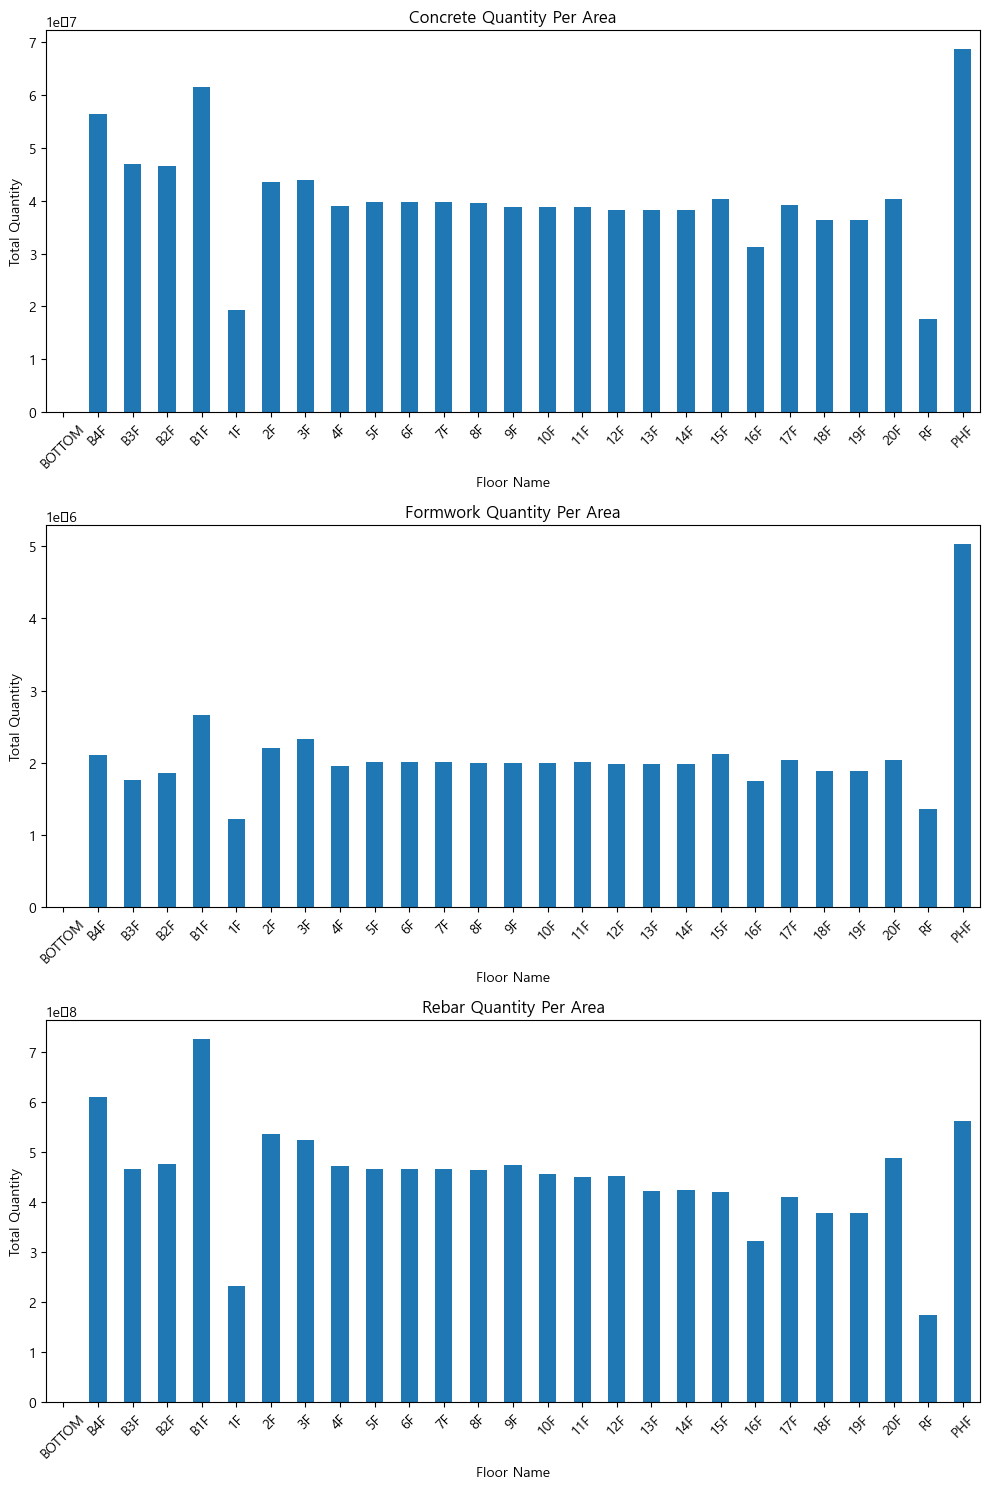

In [ ]:


# 데이터 시각화
fig, axs = plt.subplots(3, 1, figsize=(10, 15))

materials = ['area_concrete', 'area_formwork', 'area_rebar']
titles = ['Concrete Quantity Per Area', 'Formwork Quantity Per Area', 'Rebar Quantity Per Area']

for i, ax in enumerate(axs):
    df[materials[i]].plot(kind='bar', ax=ax)
    ax.set_xticklabels(df['floor_name'], rotation=45)
    ax.set_xlabel("Floor Name")
    ax.set_ylabel("Total Quantity")
    ax.set_title(titles[i])

plt.tight_layout()
plt.show()


In [ ]:
def calculate_metrics_per_project(engine):
    # 각 프로젝트의 총 면적을 계산
    area_df = pd.read_sql_query(text("""
        SELECT p.id AS project_id, p.project_name, SUM(f.floor_area) AS total_area
        FROM project AS p   
        JOIN building AS b ON p.id = b.project_id
        JOIN floor AS f ON b.id = f.building_id
        GROUP BY p.id
    """), engine)

    # 각 프로젝트의 총 콘크리트 양을 계산
    concrete_df = pd.read_sql_query(text("""
        SELECT p.id AS project_id, SUM(c.volume) AS total_concrete
        FROM project AS p
        JOIN building AS b ON p.id = b.project_id
        JOIN floor AS f ON b.id = f.building_id
        JOIN component AS comp ON f.id = comp.floor_id
        JOIN concrete AS c ON comp.id = c.component_id
        GROUP BY p.id
    """), engine)

    # 각 프로젝트의 총 rebar 양을 계산
    rebar_df = pd.read_sql_query(text("""
        SELECT p.id AS project_id, SUM(r.rebar_weight) AS total_rebar
        FROM project AS p
        JOIN building AS b ON p.id = b.project_id
        JOIN floor AS f ON b.id = f.building_id
        JOIN component AS comp ON f.id = comp.floor_id
        JOIN rebar AS r ON comp.id = r.component_id
        GROUP BY p.id
    """), engine)

    # 각 프로젝트에 대한 총 면적, 총 콘크리트 양, 총 rebar 양을 결합
    result_df = pd.merge(area_df, concrete_df, on='project_id')
    result_df = pd.merge(result_df, rebar_df, on='project_id')

    # 각 프로젝트에 대한 면적당 콘크리트 양과 rebar 양을 계산
    result_df['concrete_per_area'] = result_df['total_concrete'] / result_df['total_area']
    result_df['rebar_per_area'] = result_df['total_rebar'] / result_df['total_area']

    # 결과를 반환
    return result_df

result_df = calculate_metrics_per_project(engine)
result_df


,project_id,project_name,total_area,total_concrete,total_rebar,concrete_per_area,rebar_per_area
0,1,계룡_대전 용전근린공원 공동주택 신축공사,1.679734e+11,80074.123943,5480.841337,4.767072e-07,3.262922e-08
1,2,신세계_어바인시티,1.647911e+11,182585.179918,11629.221441,1.107979e-06,7.056946e-08
2,3,화성 송산그린시티 EB2 도시형생활주택 신축공사,4.506058e+10,43047.224990,4629.348808,9.553190e-07,1.027361e-07
3,4,화성 송산그린시티 EB3 도시형생활주택 신축공사,4.467206e+10,37189.442067,4356.372801,8.324990e-07,9.751897e-08
4,5,대전천동 3구역_4BL 공동주택 건설공사,3.195764e+11,320382.697978,27470.519925,1.002523e-06,8.595917e-08
5,6,광명동 344번지 복합개발사업,4.471347e+10,29991.274973,2711.949476,6.707437e-07,6.065174e-08
6,7,DK TOWER 지식산업센터 신축공사,1.038666e+11,94084.862867,7224.894832,9.058240e-07,6.955937e-08
7,8,덕산의료재단 수원덕산병원 신축공사,1.199504e+11,120433.983009,8618.759367,1.004031e-06,7.185269e-08
8,9,동부건설_여주시 교동 3지구 지역주택조합 아파트 신축공사,1.112886e+11,51110.706891,3831.998614,4.592629e-07,3.443300e-08
9,10,동부건설_동두천 지행동 B10 공동주택,1.504881e+11,197196.256835,12347.313728,1.310378e-06,8.204844e-08


C:\Users\indig\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


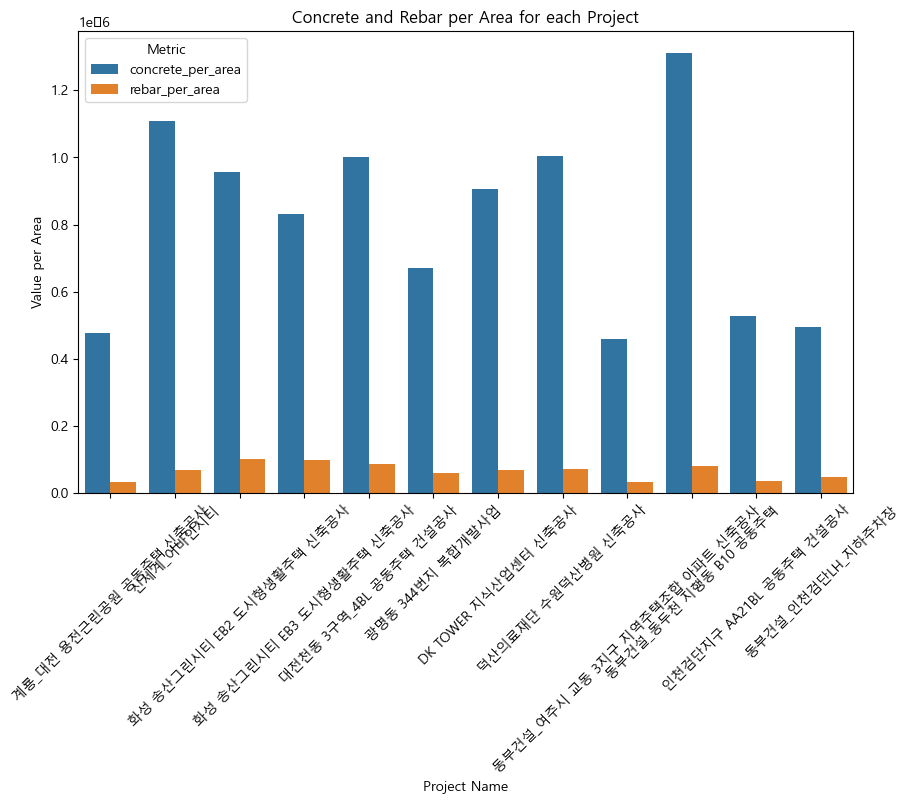

In [ ]:

import seaborn as sns

def plot_separate_bar_chart(df):
    # 데이터프레임을 재구조화하여 면적당 콘크리트와 rebar의 양을 각각의 열로 만듭니다.
    df_melt = df.melt(id_vars='project_name', value_vars=['concrete_per_area', 'rebar_per_area'], var_name='Metric', value_name='Value')

    # 바 차트를 그립니다.
    plt.figure(figsize=(10, 6))
    sns.barplot(x='project_name', y='Value', hue='Metric', data=df_melt)
    plt.xlabel('Project Name')
    plt.ylabel('Value per Area')
    plt.title('Concrete and Rebar per Area for each Project')
    plt.xticks(rotation=45)
    plt.show()


plot_separate_bar_chart(result_df)


In [ ]:
def calculate_rebar_per_concrete_volume(engine, project_name):
    # 각 component type의 콘크리트 볼륨을 계산합니다.
    query_concrete = f"""
    SELECT 
        component.component_type as component_type,
        SUM(concrete.volume) as total_concrete_volume
    FROM 
        concrete 
        JOIN component ON concrete.component_id = component.id
        INNER JOIN floor ON component.floor_id = floor.id
        INNER JOIN building ON floor.building_id = building.id
        INNER JOIN project ON building.project_id = project.id
    WHERE
        project.project_name = '{project_name}'
    GROUP BY 
        component.component_type
    ORDER BY 
        component.component_type ASC
    """
    
    df_concrete = pd.read_sql_query(query_concrete, engine)
    
    # 각 component type의 rebar 무게를 계산합니다.
    query_rebar = f"""
    SELECT 
        component.component_type as component_type,
        SUM(rebar.rebar_weight) as total_rebar_weight
    FROM 
        rebar 
        JOIN component ON rebar.component_id = component.id
        INNER JOIN floor ON component.floor_id = floor.id
        INNER JOIN building ON floor.building_id = building.id
        INNER JOIN project ON building.project_id = project.id
    WHERE
        project.project_name = '{project_name}'
    GROUP BY 
        component.component_type
    ORDER BY 
        component.component_type ASC
    """

    df_rebar = pd.read_sql_query(query_rebar, engine)
    
    # 두 데이터프레임을 component_type 기준으로 병합합니다.
    df = pd.merge(df_concrete, df_rebar, on='component_type', how='inner')

    # 콘크리트 볼륨 당 rebar 무게를 계산합니다.
    df['rebar_weight_per_concrete_volume'] = df['total_rebar_weight'] / df['total_concrete_volume']

    # 프로젝트 이름을 추가합니다. 이렇게 하면 나중에 모든 프로젝트의 결과를 하나의 데이터프레임으로 합칠 때 각 결과가 어떤 프로젝트에 대한 것인지 알 수 있습니다.
    df['project_name'] = project_name
    
    return df[['project_name', 'component_type', 'rebar_weight_per_concrete_volume']]





In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_rebar_per_concrete_volume(df):
    plt.figure(figsize=(10, 6))
    sns.barplot(x='component_type', y='rebar_weight_per_concrete_volume', hue='project_name', data=df)
    plt.xlabel('Component Type')
    plt.ylabel('Rebar Weight per Concrete Volume')
    plt.title('Rebar Weight per Concrete Volume for each Component Type')
    plt.xticks(rotation=45)
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.show()





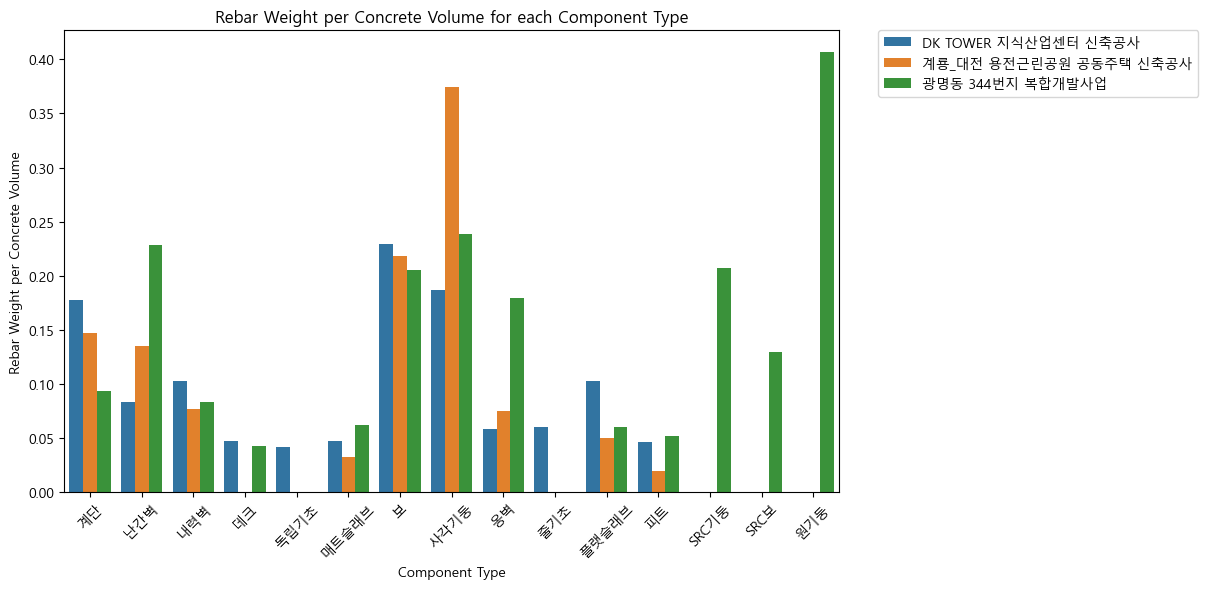

In [ ]:

def calculate_for_all_projects(engine, limit):
    # 'project' 테이블에서 모든 프로젝트 이름을 가져옵니다.
    query_project = f"SELECT project_name FROM project LIMIT {limit}"
    df_project = pd.read_sql_query(query_project, engine)

    # 결과를 저장할 빈 데이터프레임을 만듭니다.
    df_all = pd.DataFrame()

    # 각 프로젝트에 대해 calculate_rebar_per_concrete_volume() 함수를 실행하고 결과를 df_all에 추가합니다.
    for project_name in df_project['project_name']:
        df = calculate_rebar_per_concrete_volume(engine, project_name)
        df_all = pd.concat([df_all, df])
    
    return df_all


# 모든 프로젝트의 데이터를 가져옵니다.
df_all = calculate_for_all_projects(engine,3)

# 가져온 데이터로 바 차트를 그립니다.
plot_rebar_per_concrete_volume(df_all)




In [ ]:
def get_unique_section_names(engine, table_name, component_type):
    query = f"SELECT DISTINCT section_name FROM {table_name} WHERE component_type = '{component_type}'"
    df = pd.read_sql(query, engine)
    return df['section_name'].tolist()


component_types = ['내력벽', '보', '옹벽']
for component_type in component_types:
    section_names = get_unique_section_names(engine, 'component', component_type)
    print(f"Unique section names in table concrete for component type '{component_type}': {section_names}")

Unique section names in table concrete for component type '내력벽': ['CWA', 'CW19A', 'CW14', 'CW18', 'CW20', 'WA', '4W3', '4HW3', '4W4', '4HW2', '4W2', '4HW1', 'CW4', 'CW5', 'CW9A', 'CW10', 'CW7', 'CW8', 'W1A', 'CW6', 'CW11', '1W1', '1HW5', '1W3', '1W2', '1W4', 'W1B', 'CW1', '4HW4', 'CW17', 'CW15', 'CW16', '5W1', '5W3', '5W5', '5W2', '5W4', '5HW5', '5HW6', '5HW7', '4W1', 'W1C', '5HW7A', '5HW2', '5HW1', 'CW2', '5HW4', '4HW5', '4HW6', '5HW3', 'CWB', 'CW3', 'APW1', '4W5', '4W6', 'EW1', 'W100', '1W5', '1HW1', '1HW2', '1HW4', '1HW6', '1HW7', '1HW8', 'CW13', 'CW12', '5W6', '1HW3', 'WA(250)', 'PHW1', 'PHW2', 'W200', 'W(250)200', 'CW9', 'CW19', '3W1', '2W1', '3W3', '2W2', '3HW3', '3HW4', 'CW21', '3HW1', '2HW2', 'W1DA', '3W2', 'W1D', '2HW3', '2W3', '2W4', '3HW5', '3HW6', 'CW22', 'CW22A', '3W4', 'WB', 'W1EA', 'W1E', 'DAW1', '2HW6', '3W1A', '2W5', '2HW1', '2HW4', '2HW5', 'W200(250)', 'APW1(200)', 'W1CA', '5W6A', 'WA(150)', '5W6B', '1HW7A', 'CW05', 'EW03', '84AW14', 'CW04', 'PW1(600이상)', '84AW22', '8

In [ ]:

def count_section_names(engine, table_name, component_type):
    query = f"SELECT section_name, COUNT(*) as count FROM {table_name} WHERE component_type = '{component_type}' GROUP BY section_name"
    df = pd.read_sql(query, engine)
    return df.to_dict('records')

component_types = ['내력벽', '보', '옹벽']
for component_type in component_types:
    section_name_counts = count_section_names(engine, 'component', component_type)
    print(f"Counts of section names in table concrete for component type '{component_type}': {section_name_counts}")


Counts of section names in table concrete for component type '내력벽': [{'section_name': 'CWA', 'count': 1021}, {'section_name': 'CW19A', 'count': 30}, {'section_name': 'CW14', 'count': 422}, {'section_name': 'CW18', 'count': 201}, {'section_name': 'CW20', 'count': 200}, {'section_name': 'WA', 'count': 3090}, {'section_name': '4W3', 'count': 75}, {'section_name': '4HW3', 'count': 145}, {'section_name': '4W4', 'count': 79}, {'section_name': '4HW2', 'count': 79}, {'section_name': '4W2', 'count': 79}, {'section_name': '4HW1', 'count': 79}, {'section_name': 'CW4', 'count': 760}, {'section_name': 'CW5', 'count': 493}, {'section_name': 'CW9A', 'count': 150}, {'section_name': 'CW10', 'count': 342}, {'section_name': 'CW7', 'count': 298}, {'section_name': 'CW8', 'count': 249}, {'section_name': 'W1A', 'count': 787}, {'section_name': 'CW6', 'count': 468}, {'section_name': 'CW11', 'count': 520}, {'section_name': '1W1', 'count': 183}, {'section_name': '1HW5', 'count': 176}, {'section_name': '1W3', 'co

In [ ]:
def aggregate_rebar_weight(engine, limit):
    # 이건 나중에 limit으로 제한하므로 느리다.
    # query = f"""
    # SELECT p.project_name, r.rebar_diameter, SUM(r.rebar_weight) as total_rebar_weight
    # FROM rebar r
    # JOIN component c ON r.component_id = c.id
    # JOIN floor f ON c.floor_id = f.id
    # JOIN building b ON f.building_id = b.id
    # JOIN project p ON b.project_id = p.id 
    # GROUP BY p.project_name, r.rebar_diameter
    # LIMIT {limit}
    # """

    query = f"""
    SELECT p.project_name, r.rebar_diameter, SUM(r.rebar_weight) as total_rebar_weight
    FROM (
        SELECT *
        FROM project
        LIMIT {limit}
    ) p
    JOIN building b ON p.id = b.project_id
    JOIN floor f ON b.id = f.building_id
    JOIN component c ON f.id = c.floor_id
    JOIN rebar r ON c.id = r.component_id
    GROUP BY p.project_name, r.rebar_diameter
    """

    df = pd.read_sql(query, engine)
    return df

df = aggregate_rebar_weight(engine, 3)
df


,project_name,rebar_diameter,total_rebar_weight
0,계룡_대전 용전근린공원 공동주택 신축공사,19.0,699.678806
1,계룡_대전 용전근린공원 공동주택 신축공사,13.0,871.585340
2,계룡_대전 용전근린공원 공동주택 신축공사,22.0,182.185495
3,계룡_대전 용전근린공원 공동주택 신축공사,10.0,3542.091994
4,계룡_대전 용전근린공원 공동주택 신축공사,16.0,185.299702
5,신세계_어바인시티,10.0,3083.116914
6,신세계_어바인시티,16.0,1971.084015
7,신세계_어바인시티,19.0,302.501369
8,신세계_어바인시티,13.0,1297.419705
9,신세계_어바인시티,22.0,2821.917608


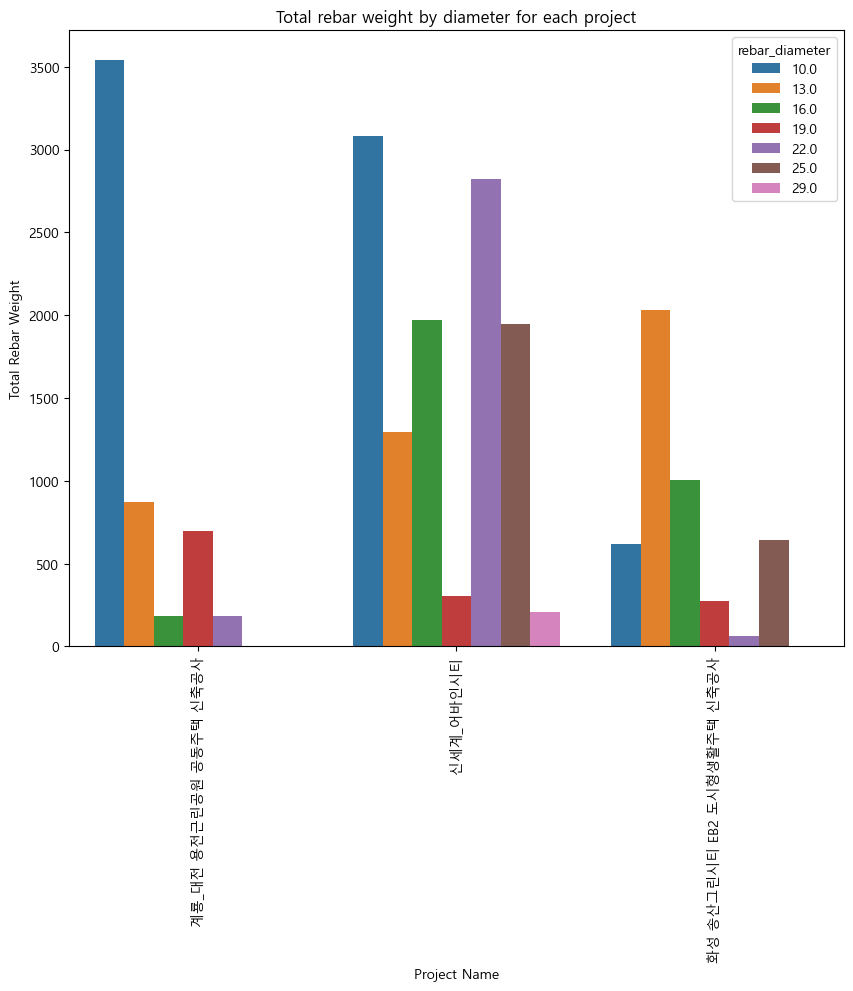

In [ ]:
plt.figure(figsize=(10, 8))
sns.barplot(x="project_name", y="total_rebar_weight", hue="rebar_diameter", data=df)
plt.title("Total rebar weight by diameter for each project")
plt.xlabel("Project Name")
plt.ylabel("Total Rebar Weight")
plt.xticks(rotation=90)
plt.show()

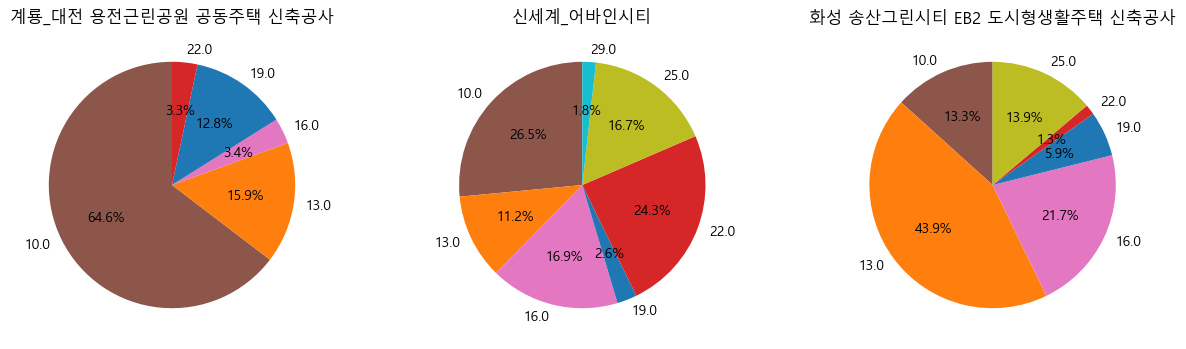

In [ ]:


project_names = df['project_name'].unique()

# 컬러 맵을 생성합니다. 각 rebar_diameter에 대해 유일한 색상을 매핑합니다.
unique_diameters = df['rebar_diameter'].unique()
colors = plt.cm.tab10(np.linspace(0, 1, len(unique_diameters)))
color_map = dict(zip(unique_diameters, colors))

fig, axs = plt.subplots(1, len(project_names), figsize=(15, 4))

for i, project_name in enumerate(project_names):
    data = df[df['project_name'] == project_name]
    # 데이터를 rebar_diameter 기준으로 정렬합니다.
    data = data.sort_values(by='rebar_diameter')
    # 각 파이 슬라이스에 대한 색상을 선택합니다.
    slice_colors = [color_map[diameter] for diameter in data['rebar_diameter']]
    axs[i].pie(data['total_rebar_weight'], labels=data['rebar_diameter'], autopct='%1.1f%%', colors=slice_colors, startangle=90)
    axs[i].set_title(project_name)

plt.show()

In [ ]:

# def aggregate_weight_volume_ratio(engine):
#     query = """
#     SELECT 
#         c.component_type, 
#         SUM(r.rebar_weight) / SUM(c.volume) as weight_volume_ratio
#     FROM 
#         rebar r
#     JOIN 
#         concrete c ON r.floor_id = c.floor_id
#     WHERE
#         r.component_type = c.component_type
#     GROUP BY 
#         c.component_type
#     """
#     df = pd.read_sql(query, engine)
#     return df

# df = aggregate_weight_volume_ratio(engine)

# # 각 component_type별로 평균과 표준편차를 계산합니다.
# summary_df = df.groupby('component_type').agg(['mean', 'std'])

# # Boxplot을 그립니다.
# plt.figure(figsize=(10, 6))
# sns.boxplot(data=df, x='component_type', y='weight_volume_ratio')
# plt.title('Rebar Weight / Concrete Volume by Component Type')
# plt.ylabel('Weight/Volume Ratio')
# plt.show()


In [1]:
from fastapi import FastAPI
from fastapi.middleware.cors import CORSMiddleware
from fastapi.responses import JSONResponse
import json
import threading

import pandas as pd
import pymysql
from pymysql.cursors import DictCursor
from sqlalchemy import create_engine, text
from sqlalchemy_utils import database_exists, create_database
import os
import numpy as np
import requests

from sqlalchemy.orm import Session

db_config = {
    "host": "changsoft1.iptime.org",
    "port": 18800,
    "user": "changsoft",
    "password": "chang2008!",
    "database": "structure2",
}

db_url = f"mysql+pymysql://{db_config['user']}:{db_config['password']}@{db_config['host']}:{db_config['port']}/{db_config['database']}"

engine = create_engine(db_url)

db_name = db_config["database"]

try:
    connection = engine.connect()
    if connection:
        print(f"Successfully connected to database {db_name}")
    else:
        print("Failed to create connection")
        exit()
except Exception as e:
    print(f"An error occurred when trying to connect to database {db_name}: {str(e)}")
    exit()

query = f"""
        SELECT *
        FROM structure2.project AS p
        JOIN structure2.building AS b ON p.id = b.project_id
        WHERE p.id = 1;
    """
building_df = pd.read_sql(query, engine)
building_df.info
building_df.columns

Successfully connected to database structure2


Index(['id', 'project_name', 'construction_company', 'zone', 'location',
       'total_area', 'seismic_coefficient', 'wind_exposure_cat',
       'wind_tunnel_test', 'rainfall', 'ground_characteristics',
       'construction_start', 'construction_end', 'usage', 'building_area',
       'wind_speed', 'building_name', 'screenshot', 'stories', 'height',
       'construction_method', 'structure_type', 'top_down', 'plane_shape',
       'foundation_type', 'structure_code', 'performance_design_target',
       'project_id'],
      dtype='object')